**Importing Library**

In [1]:
!pip install numpy==1.26.3 streamlit==1.30.0 tensorflow==2.15.0 seaborn matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Loading the datasets**

In [3]:
from tensorflow.keras import datasets, layers, models

In [4]:
# Load the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt


num_images_to_save = 100
output_directory = f"fashion_mnist_image_train"

import os
os.makedirs(output_directory, exist_ok=True)

indices = np.random.randint(0, X_train.shape[0], num_images_to_save)

for i, idx in enumerate(indices):
    image_path = os.path.join(output_directory, f"fashion_mnist_image_{i}_l{y_train[idx]}.png")
    plt.imsave(image_path, X_train[idx], cmap='gray')
    print(f"Photo saved {image_path}")

print("The image saving process is complete.")


Photo saved fashion_mnist_image_train\fashion_mnist_image_0_l7.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_1_l6.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_2_l8.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_3_l7.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_4_l4.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_5_l6.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_6_l5.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_7_l3.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_8_l5.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_9_l6.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_10_l3.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_11_l7.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_12_l1.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_13_l6.png
Photo saved fashion_mnist_image_train\fashion_mnist_image_

In [6]:
import os
from PIL import Image
import numpy as np

data_train_path = "fashion_mnist_image_train" 

images = []
labels = []

for file_name in os.listdir(data_train_path):
    # print("Readed")
    file_path = os.path.join(data_train_path, file_name)
    img = Image.open(file_path)
    img_array = np.array(img)
    images.append(img_array)
    label = int(file_name.split('.')[0][-1]) 
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


Shape of images array: (196, 28, 28, 4)
Shape of labels array: (196,)


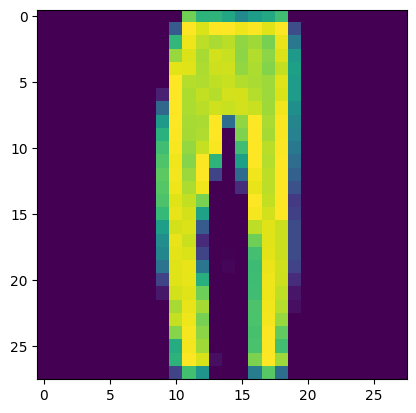

1


In [7]:
from sklearn.metrics import euclidean_distances


def min_distance(image_test):
    min_val = None
    min_dis = float('inf')
    for train_img_array in images:
        train_img_array = train_img_array[:, :, 0]
        distance = euclidean_distances(train_img_array, image_test).sum()
        if min_dis > distance:
            min_dis = distance
            min_val = train_img_array
    return min_val

j = 2

plt.imshow(min_distance(X_test[j]))
plt.show()

print(y_test[j])

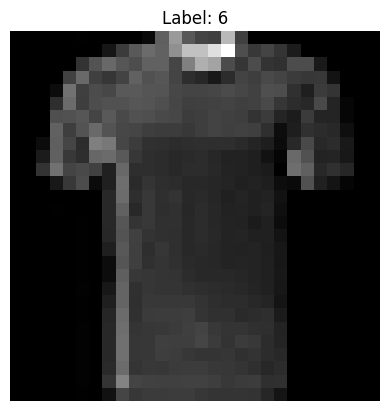

In [8]:
plt.imshow(images[0], cmap='gray')  # Sử dụng cmap='gray' để hiển thị ảnh xám
plt.title(f"Label: {label}")
plt.axis('off')  # Tắt các trục
plt.show()

**Assign Label Name**

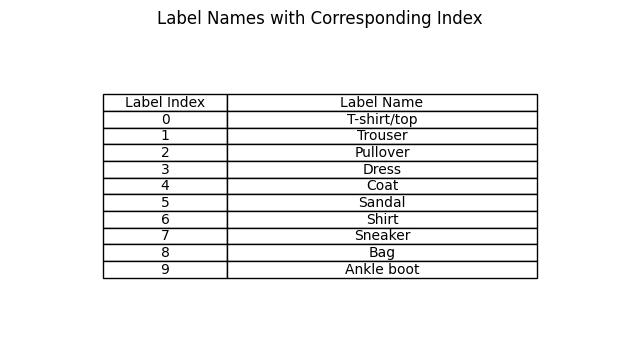

In [9]:
import matplotlib.pyplot as plt

label_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat', 
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]

plt.figure(figsize=(8, 4))
plt.axis('off')  # Turn off the axis
plt.table(cellText=[[i, label_names[i]] for i in range(len(label_names))],
          colLabels=['Label Index', 'Label Name'],
          loc='center',
          cellLoc='center',
          colWidths=[0.2, 0.5])
plt.title("Label Names with Corresponding Index")
plt.show()

**Display Sample Data**

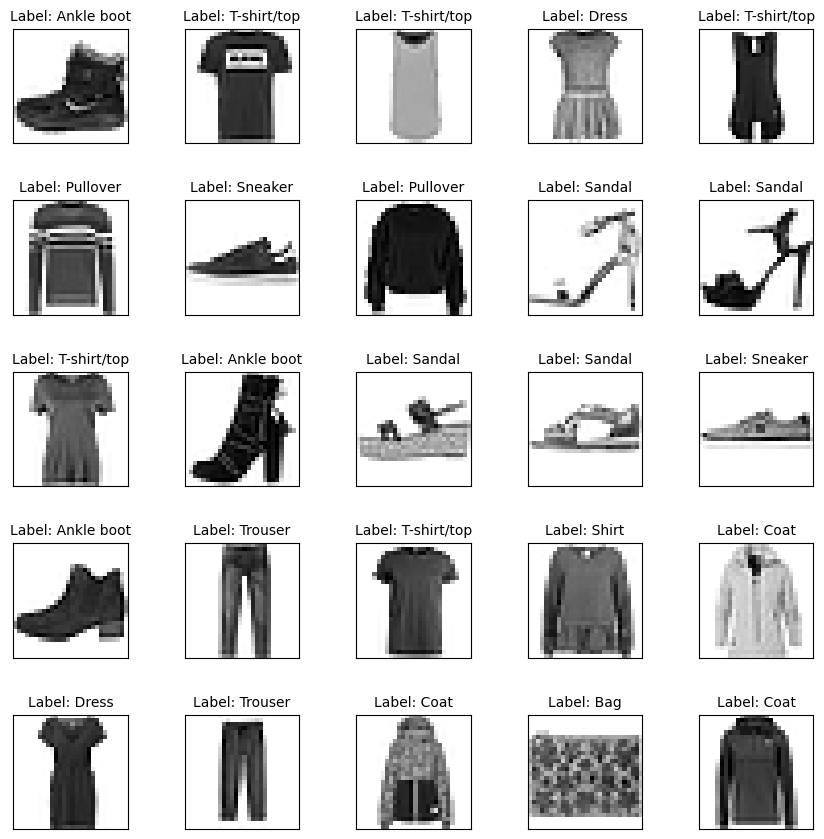

In [10]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.5, wspace=0.5)

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.set_title(f"Label: {label_names[y_train[i]]}", fontsize=10)


**Reshaping the datase**

In [11]:
# Reshaping the dataset

_, n, m = X_train.shape

X_train_flatten = X_train.reshape(X_train.shape[0], n*m) 
X_test_flatten = X_test.reshape(X_test.shape[0], n*m)  

# Change integers to 32-bit floating point numbers
X_train_flatten = X_train_flatten.astype('float32')   
X_test_flatten = X_test_flatten.astype('float32')

print("Training matrix shape", X_train_flatten.shape)
print("Testing matrix shape", X_test_flatten.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


**Standardizing the data**

In [12]:
!pip install -U scikit-learn

In [13]:
# Apply standarization to both train and test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_flatten)
X_test_scaled = scaler.transform(X_test_flatten)

In [14]:
import pickle

In [15]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

**PCA - Data dimensionality reduction**

In [16]:
# initializing the pca 
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)

PCA(n_components=0.95)

In [18]:
print(f'Total number of components used after PCA : {pca.n_components_}')

Total number of components used after PCA : 256


In [19]:
X_train_PCA = pca.transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

print(f'X_train_PCA shape : {X_train_PCA.shape}')
print(f'X_test_PCA shape : {X_test_PCA.shape}')

X_train_PCA shape : (60000, 256)
X_test_PCA shape : (10000, 256)


**Save the object to Pickle**

In [20]:
import pickle

In [21]:
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)

**Train the Neural Network**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [23]:
# Set up NN

m_r, n_r = X_train_PCA.shape
lambda_ = 0.001

model = Sequential(
    [
        tf.keras.Input(shape=(n_r,)),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(lambda_)),
        Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(lambda_)),
        Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(lambda_)),
        Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(lambda_)),
        Dense(10, activation='linear')
    ], name = "NN"
)

In [24]:
model.summary()

Model: "NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 60)                15420     
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 10)                610       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 85592 (334.34 KB)
Trainable params: 85592 (334.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'get_weights'):
        W, b = layer.get_weights()
        print(f"W{i + 1} shape = {W.shape}, b{i + 1} shape = {b.shape}")

W1 shape = (256, 256), b1 shape = (256,)
W2 shape = (256, 60), b2 shape = (60,)
W3 shape = (60, 60), b3 shape = (60,)
W4 shape = (60, 10), b4 shape = (10,)
W5 shape = (10, 10), b5 shape = (10,)


In [26]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(
    X_train_PCA,y_train,
    epochs=50
)

Epoch 1/50


1875/1875 [==============================] - 10s 4ms/step - loss: 1.5210 - accuracy: 0.8113
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7685 - accuracy: 0.8526
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6704 - accuracy: 0.8593
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6270 - accuracy: 0.8648
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6007 - accuracy: 0.8655
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5821 - accuracy: 0.8672
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5682 - accuracy: 0.8687
Epoch 8/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5597 - accuracy: 0.8693
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5500 - accuracy: 0.8715
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.

**Model Evaluation**

In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_PCA, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.8603

Test accuracy: 0.8603000044822693


1/1 [==============================] - 0s 148ms/step


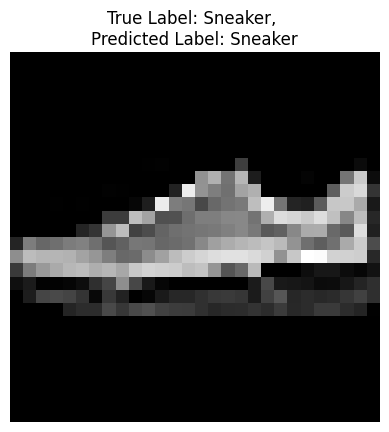

In [28]:
c_i = 9

predictions = model.predict(X_test_PCA[c_i].reshape(1, X_test_PCA.shape[1]))
predicted_label = np.argmax(predictions[0])

plt.imshow(X_test[c_i], cmap='gray')
plt.title(f"True Label: {label_names[y_test[c_i]]}, \nPredicted Label: {label_names[predicted_label]}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 23ms/step


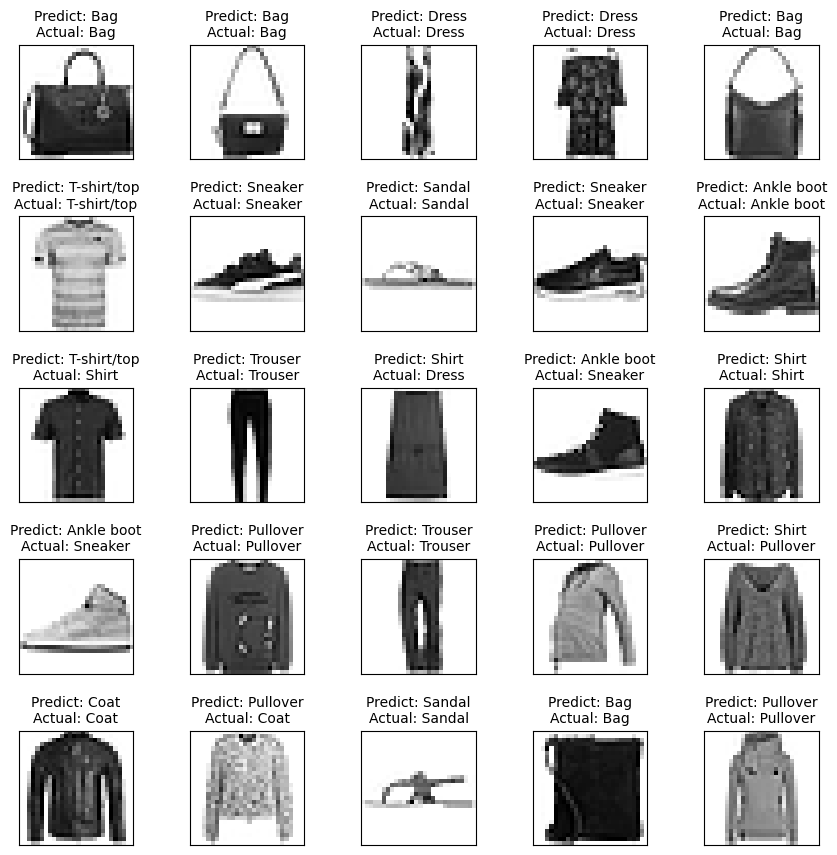

In [29]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.5, wspace=0.5)

step = 30

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i + step], cmap=plt.cm.binary, interpolation='nearest')
    s = ""
    prediction = model.predict(X_test_PCA[i + step].reshape(1, X_test_PCA.shape[1]))
    s += "Predict: " + label_names[np.argmax(prediction)] + '\n'
    s += "Actual: " + label_names[y_test[i + step]]
    ax.set_title(f"{s}", fontsize=10)

In [30]:
model.save('model.h5')

c:\Users\doant\anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
import numpy as np
import matplotlib.pyplot as plt


num_images_to_save = 1000
output_directory = f"fashion_mnist_image_test"

import os
os.makedirs(output_directory, exist_ok=True)

indices = np.random.randint(0, X_test.shape[0], num_images_to_save)

for i, idx in enumerate(indices):
    image_path = os.path.join(output_directory, f"fashion_mnist_image_{i}_l{y_test[idx]}.png")
    plt.imsave(image_path, X_test[idx], cmap='gray')
    print(f"Photo saved {image_path}")

print("The image saving process is complete.")

Photo saved fashion_mnist_image_test\fashion_mnist_image_0_l8.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_1_l8.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_2_l7.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_3_l2.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_4_l4.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_5_l7.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_6_l3.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_7_l2.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_8_l1.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_9_l2.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_10_l9.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_11_l8.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_12_l5.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_13_l6.png
Photo saved fashion_mnist_image_test\fashion_mnist_image_14_l8.png
Photo